Load Required packages


In [2]:
import pandas as pd
import numpy as np
import sys
import csv
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Input,Dropout
from keras.models import Model
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPClassifier as ANN

Load data, you can load full data or you can also load training and test data files independently

In [ ]:
# INPUT NORMALIZED DATASET WITH ONLY 'ID' COLUMN and features COLUMN

#train = pd.read_table('https://raw.githubusercontent.com/pine-bio-support/Predictive_model_Classification_Regression/main/new_train2.txt')

#test = pd.read_table('https://raw.githubusercontent.com/pine-bio-support/Predictive_model_Classification_Regression/main/new_test2.txt')


In [3]:
#Load data
data = pd.read_table('https://raw.githubusercontent.com/pine-bio-support/ML-Demo/master/CellLines_52samples_ExprData_T1_new.txt',sep='\t',header=(0))
data.shape

(6917, 53)

First Transpose Data, then take gene expression table and Labels into X and y objects, respectively

In [4]:
data=data.drop(['id'], axis = 1) 

dataT = np.transpose(data)

X = dataT.iloc[:, 1:].values
y = dataT.iloc[:, 0].values

Split Data into training and Test into 80:20 ratio


In [5]:
#Split training and test data into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [ ]:
X_train

array([[4.15, 5.9 , 5.26, ..., 3.04, 5.17, 5.42],
       [4.69, 4.72, 5.97, ..., 4.08, 3.3 , 4.37],
       [7.29, 5.47, 4.5 , ..., 4.92, 1.12, 4.5 ],
       ...,
       [5.25, 5.39, 6.  , ..., 3.9 , 1.6 , 4.65],
       [5.32, 6.11, 5.78, ..., 3.68, 4.19, 3.85],
       [6.39, 5.3 , 4.16, ..., 4.37, 3.92, 6.18]])

In [ ]:
y_train

array([1., 2., 2., 3., 0., 2., 3., 1., 2., 2., 1., 2., 2., 2., 1., 2., 2.,
       2., 3., 2., 2., 2., 1., 1., 2., 2., 1., 0., 1., 1., 2., 2., 0., 2.,
       3., 2., 1., 3., 0., 2., 2.])

In [ ]:
y_train.shape

(41,)

In [ ]:
X_train.shape[1]

6916

**Define KERAS model**: Models in Keras are defined as a sequence of layers.
We will create a Sequential model and add layers one at a time to create a network architecture.

The first thing  to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument which is equal to the input variables (features/genes in our case).

Fully connected layers are defined using the Dense class. We can specify the number of neurons or nodes in the layer as the first argument, and specify the activation function using the activation argument.

Here, We will use the rectified linear unit activation function referred to as ReLU on the first five layers and the Sigmoid function in the output layer.

Our model have following features
The model expects rows of data with 6916 variables (the input_dim=ncol argument)
The first hidden layer has 500 nodes and uses the relu activation function.
The second hidden layer has 100 nodes and uses the relu activation function.
3rd and 4th layers has 500 and 100 nodes
The output layer has one node and uses the sigmoid activation function.

In [6]:
ncol = X_train.shape[1]

input_dim = Input(shape = (ncol, ))

encoding_dim = 50 #this can be changed if you want to create more features

encoded = Dense(500, activation = 'relu')(input_dim)
encoded = Dropout(0.5)(encoded) #DROUPOUT
encoded = Dense(100, activation = 'relu')(encoded)
encoded = Dense(encoding_dim, activation = 'relu')(encoded) # BOTTLENECK LAYER

# Decoder Layers
decoded = Dense(100, activation = 'relu')(encoded)
decoded = Dense(500, activation = 'relu')(decoded)
decoded = Dense(1, activation = 'sigmoid')(decoded)


# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded)


In [ ]:
input_dim

<KerasTensor: shape=(None, 6916) dtype=float32 (created by layer 'input_12')>

In [ ]:
ncol

6916

In [ ]:
autoencoder

**Compile Keras Model**
Now, we can compile model. Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as TensorFlow or Thiano. The backend automatically chooses the best way to represent the network for training and making predictions. When compiling, we must specify some additional properties required when training the network. Remember training a network means finding the best set of weights to map inputs to outputs in our dataset.
We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.
**In this case, we will use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“.**  for, multiclass ....

We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems



In [7]:
# Compile model
#Binary class model
#autoencoder.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

#multiclass model
autoencoder.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [8]:
autoencoder

**Fit Keras Model**
We can train or fit our model on our loaded data by calling the fit() function on the model. Training occurs over epochs and each epoch is split into batches.
**Epoch:** One pass through all of the rows in the training dataset.
**Batch:** One or more samples considered by the model within an epoch before weights are updated.
One epoch is comprised of one or more batches, based on the chosen batch size and the model is fit for many epochs. 

In [18]:
autoencoder.fit(X_train, y_train, epochs=20, batch_size=3, verbose=1)

Epoch 1/20
14/14 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 0.2439
Epoch 2/20
14/14 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.2439
Epoch 3/20
14/14 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.2439
Epoch 4/20
14/14 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.2439
Epoch 5/20
14/14 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.2439
Epoch 6/20
14/14 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.2439
Epoch 7/20
14/14 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.2439
Epoch 8/20
14/14 [==============================] - 0s 18ms/step - loss: 0.0000e+00 - accuracy: 0.2439
Epoch 9/20
14/14 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 0.2439
Epoch 10/20
14/14 [==============================] - 0s 19ms/step - loss:

## **summarize history for loss** and plot it

In [45]:
history = autoencoder.fit(X_train, y_train, validation_split=0.30, epochs=20, batch_size=3)

Epoch 1/20
10/10 [==============================] - 0s 26ms/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.2308
Epoch 2/20
10/10 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.2308
Epoch 3/20
10/10 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.2308
Epoch 4/20
10/10 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.2308
Epoch 5/20
10/10 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.2308
Epoch 6/20
10/10 [==============================] - 0s 23ms/step - loss: 0.0000e+00 - accuracy: 0.2500 - val_loss: 0.0000e+00 - val_accuracy: 0.2308
Epoch 7/20
10/10 [==============================] - 0s 22ms/step - loss: 0.0000e+00 - accuracy: 0.2500 - v

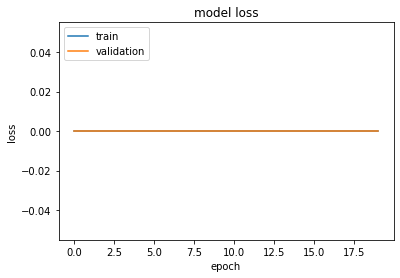

In [44]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Evaluate Keras Model**
Now, we can evaulate the model on training and test datasets
This will only give us an idea of how well we have modeled the dataset (e.g. train accuracy), but no idea of how well the algorithm might perform on new data. We have done this for simplicity, but ideally, you could separate your data into train and test datasets for training and evaluation of your model.We can evaluate your model  using the evaluate() function on your model.

The evaluate() function will return a list with two values. The first will be the loss of the model on the dataset and the second will be the accuracy of the model on the dataset.

In [21]:
# evaluate the keras model
accuracy_train = autoencoder.evaluate(X_train, y_train, verbose=0)

In [22]:
accuracy_train

[0.0, 0.24390244483947754]

In [23]:
# make probability predictions with the model
predictions = autoencoder.predict(X_train)

In [26]:
predictions

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [27]:
# summarize the first 10 cases of training
for i in range(10):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[6.06, 4.47, 4.47, 5.27, 6.05, 6.24, 4.17, 6.55, 5.19, 7.12, 4.3, 6.96, 3.92, 0.0, 6.87, 1.77, 1.63, 4.03, 3.23, 5.74, 0.63, 7.97, 6.78, 3.32, 7.64, 7.43, 6.4, 3.97, 4.89, 3.6, 7.04, 4.21, 5.43, 5.03, 5.03, 1.89, 6.04, 9.39, 6.63, 3.3, 5.54, 5.38, 6.56, 3.42, 5.55, 3.21, 8.73, 6.1, 5.04, 5.47, 5.78, 2.58, 5.86, 0.1, 1.01, 2.89, 3.89, 6.56, 0.0, 5.76, 7.66, 4.77, 5.57, 5.86, 3.87, 5.51, 6.14, 0.0, 4.06, 5.33, 3.99, 4.7, 0.0, 6.95, 5.39, 5.2, 4.23, 0.0, 6.41, 5.22, 4.83, 6.1, 5.3, 3.81, 0.0, 5.68, 7.0, 5.3, 5.32, 0.0, 6.52, 6.13, 4.0, 9.03, 5.16, 3.56, 0.42, 5.95, 6.48, 5.27, 5.22, 10.75, 7.26, 5.14, 2.82, 4.75, 5.09, 6.0, 7.04, 8.57, 8.56, 6.65, 5.05, 7.35, 6.67, 4.28, 7.34, 2.98, 3.03, 5.51, 4.59, 4.37, 9.06, 2.23, 4.5, 6.23, 5.05, 0.0, 6.48, 4.52, 6.55, 4.38, 5.18, 4.28, 4.66, 6.95, 7.47, 5.69, 4.61, 3.22, 4.86, 6.44, 5.32, 8.28, 6.19, 5.21, 8.35, 7.08, 3.09, 4.4, 5.73, 6.55, 4.42, 1.94, 5.04, 5.62, 2.44, 5.03, 4.71, 5.83, 6.01, 2.9, 4.76, 0.0, 5.2, 3.71, 2.15, 6.45, 0.0, 5.31, 7.48, 

In [28]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_train, predictions)


array([[ 0,  4,  0,  0],
       [ 0, 10,  0,  0],
       [ 0, 22,  0,  0],
       [ 0,  5,  0,  0]])

In [29]:
# Precision 
precision_score(y_train, predictions, average='weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0594883997620464

In [30]:
# Recall
recall_score(y_train, predictions, average='weighted')

0.24390243902439024

In [31]:
# F1 score
f1_score(y_train, predictions, average='weighted')

0.09564801530368244

In [32]:
# Cohen's kappa
cohen_kappa_score(y_train, predictions)

0.0

In [33]:
# evaluate the keras model
accuracy_test = autoencoder.evaluate(X_test, y_test, verbose=0)

In [34]:
accuracy_test

[0.0, 0.3636363744735718]

In [35]:
# make probability predictions with the model
predictions_test = autoencoder.predict(X_test)

In [36]:
# summarize the first 10 cases of test
for i in range(10):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions_test[i], y[i]))

[6.06, 4.47, 4.47, 5.27, 6.05, 6.24, 4.17, 6.55, 5.19, 7.12, 4.3, 6.96, 3.92, 0.0, 6.87, 1.77, 1.63, 4.03, 3.23, 5.74, 0.63, 7.97, 6.78, 3.32, 7.64, 7.43, 6.4, 3.97, 4.89, 3.6, 7.04, 4.21, 5.43, 5.03, 5.03, 1.89, 6.04, 9.39, 6.63, 3.3, 5.54, 5.38, 6.56, 3.42, 5.55, 3.21, 8.73, 6.1, 5.04, 5.47, 5.78, 2.58, 5.86, 0.1, 1.01, 2.89, 3.89, 6.56, 0.0, 5.76, 7.66, 4.77, 5.57, 5.86, 3.87, 5.51, 6.14, 0.0, 4.06, 5.33, 3.99, 4.7, 0.0, 6.95, 5.39, 5.2, 4.23, 0.0, 6.41, 5.22, 4.83, 6.1, 5.3, 3.81, 0.0, 5.68, 7.0, 5.3, 5.32, 0.0, 6.52, 6.13, 4.0, 9.03, 5.16, 3.56, 0.42, 5.95, 6.48, 5.27, 5.22, 10.75, 7.26, 5.14, 2.82, 4.75, 5.09, 6.0, 7.04, 8.57, 8.56, 6.65, 5.05, 7.35, 6.67, 4.28, 7.34, 2.98, 3.03, 5.51, 4.59, 4.37, 9.06, 2.23, 4.5, 6.23, 5.05, 0.0, 6.48, 4.52, 6.55, 4.38, 5.18, 4.28, 4.66, 6.95, 7.47, 5.69, 4.61, 3.22, 4.86, 6.44, 5.32, 8.28, 6.19, 5.21, 8.35, 7.08, 3.09, 4.4, 5.73, 6.55, 4.42, 1.94, 5.04, 5.62, 2.44, 5.03, 4.71, 5.83, 6.01, 2.9, 4.76, 0.0, 5.2, 3.71, 2.15, 6.45, 0.0, 5.31, 7.48, 

In [37]:
# Confusion matrix for test
confusion_matrix(y_test, predictions_test)

array([[0, 1, 0, 0],
       [0, 4, 0, 0],
       [0, 5, 0, 0],
       [0, 1, 0, 0]])

In [38]:
# Precision 
precision_score(y_test, predictions_test, average='weighted')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.1322314049586777

In [39]:
# F1 score
f1_score(y_test, predictions_test, average='weighted')

0.19393939393939394

In [40]:
# Cohen's kappa
cohen_kappa_score(y_test, predictions_test)

0.0